In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. title basics

In [3]:
df_title_basics = pd.read_csv('data/raw/title.basics.tsv.gz', sep='\t', dtype={'isAdult': 'str'})

In [4]:
df_title_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
...,...,...,...,...,...,...,...,...,...
11570157,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,Drama
11570158,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,Drama
11570159,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,Drama
11570160,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


Removendo nulos em startYear, runtimeMinutes e genres

In [5]:
df_title_basics = df_title_basics.query(r'startYear != "\\N" and runtimeMinutes != "\\N" and genres != "\\N"')
df_title_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
...,...,...,...,...,...,...,...,...,...
11570112,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,\N,49,Documentary
11570118,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Game-Show,Reality-TV"
11570153,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,\N,11,"Adventure,Animation,Comedy"
11570160,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


Identificando os tipos de titulos possiveis

In [6]:
df_title_basics['titleType'].value_counts()

titleType
tvEpisode       1873356
short            667503
movie            414642
video            204166
tvSeries          99181
tvMovie           97638
tvSpecial         22947
tvMiniSeries      20398
tvShort            9206
videoGame           414
Name: count, dtype: int64

In [7]:
df_title_basics[df_title_basics['titleType']=='tvMovie']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
29761,tt0030298,tvMovie,Julius Caesar,Julius Caesar,0,1938,\N,101,"Drama,History"
38052,tt0038738,tvMovie,A Midsummer Night's Dream,A Midsummer Night's Dream,0,1946,\N,150,"Drama,Fantasy"
38752,tt0039445,tvMovie,Hamlet Part 1,Hamlet Part 1,0,1947,\N,88,Drama
38925,tt0039618,tvMovie,The Merchant of Venice,The Merchant of Venice,0,1947,\N,90,Drama
39359,tt0040060,tvMovie,Wit and Wisdom,Wit and Wisdom,0,1948,\N,45,Comedy
...,...,...,...,...,...,...,...,...,...
11569217,tt9914738,tvMovie,Les oubliés de la Mer de Chine,Les oubliés de la Mer de Chine,0,1981,\N,45,Documentary
11569554,tt9915520,tvMovie,Fascism i en svart bil,Fascism i en svart bil,0,2019,\N,55,"Documentary,History"
11569845,tt9916192,tvMovie,Danielle Darrieux: Il est poli d'être gai!,Danielle Darrieux: Il est poli d'être gai!,0,2019,\N,53,"Biography,Documentary,History"
11570023,tt9916560,tvMovie,March of Dimes Presents: Once Upon a Dime,March of Dimes Presents: Once Upon a Dime,0,1963,\N,58,Family


Filtrando para filmes

In [8]:
df_title_basics = df_title_basics.loc[df_title_basics['titleType']=='movie'].drop(columns=['titleType'])
df_title_basics

,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy"
...,...,...,...,...,...,...,...,...
11570012,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123,Drama
11570053,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
11570080,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
11570102,tt9916730,6 Gunn,6 Gunn,0,2017,\N,116,Drama


In [9]:
df_title_basics['endYear'].unique()

array(['\\N'], dtype=object)

In [10]:
df_title_basics = df_title_basics.drop(columns=['endYear'])
df_title_basics

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,Miss Jerry,0,1894,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
...,...,...,...,...,...,...,...
11570012,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,123,Drama
11570053,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,Documentary
11570080,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary
11570102,tt9916730,6 Gunn,6 Gunn,0,2017,116,Drama


In [11]:
df_title_basics['isAdult'].value_counts()

isAdult
0    408734
1      5908
Name: count, dtype: int64

In [12]:
df_title_basics.loc[df_title_basics['isAdult']=='1']

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
61182,tt0062417,Un épais manteau de sang,Un épais manteau de sang,1,1968,88,"Crime,Drama"
62363,tt0063631,Space Thing,Space Thing,1,1968,70,"Comedy,Sci-Fi"
63626,tt0064929,The Amorous Headmaster,Sangen om den røde rubin,1,1970,107,"Comedy,Drama"
63884,tt0065197,We All Go Down,We All Go Down,1,1969,73,Drama
64066,tt0065383,All the Lovin' Kinfolk,All the Lovin' Kinfolk,1,1970,84,"Comedy,Drama"
...,...,...,...,...,...,...,...
11476116,tt9713908,Costa Dogging,Costa Dogging,1,2018,94,Adult
11477079,tt9716008,Different Strokes,Different Strokes,1,1973,78,Adult
11486226,tt9735434,Dogging in the sun,Dogging in the sun,1,2018,87,Adult
11500307,tt9765780,Hemmafruarnas hemliga sexliv,Hemmafruarnas hemliga sexliv,1,1981,73,Adult


Removendo filmes adultos

In [13]:
df_title_basics = df_title_basics.loc[df_title_basics['isAdult']=='0'].drop(columns=['isAdult'])
df_title_basics

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport"
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy"
...,...,...,...,...,...,...
11570012,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama
11570053,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57,Documentary
11570080,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,2007,100,Documentary
11570102,tt9916730,6 Gunn,6 Gunn,2017,116,Drama


In [14]:
df_title_basics['startYear'] = df_title_basics['startYear'].astype(int)
df_title_basics['runtimeMinutes'] = df_title_basics['runtimeMinutes'].astype(int)


In [15]:
df_title_basics['startYear'].describe()

count    408734.000000
mean       1997.909359
std          26.703943
min        1894.000000
25%        1984.000000
50%        2009.000000
75%        2017.000000
max        2029.000000
Name: startYear, dtype: float64

Retirando filmes com lançamento após 2025

In [16]:
df_title_basics = df_title_basics[df_title_basics['startYear']<=2025]

Text(0, 0.5, 'Number of Movies')

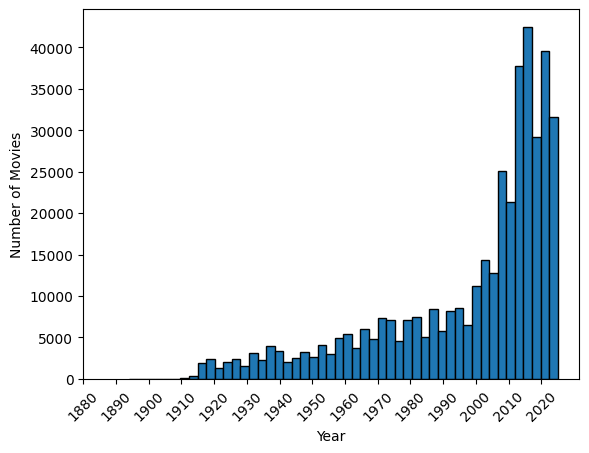

In [17]:
plt.hist(df_title_basics['startYear'], bins=50, edgecolor='black')
plt.xticks([i for i in range(1880, 2030, 10)], rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Movies')

Identificando os generos de filmes possiveis

In [18]:
aux = list(df_title_basics['genres'].unique())
unique_genres = set([])

for element in aux:
    if element != '\\N':
        for genre in element.split(','):
            unique_genres.add(genre)


unique_genres = sorted(list(unique_genres))
unique_genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [19]:
df_title_basics[df_title_basics['genres'].str.contains('Adult', na=False)]

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
119950,tt0123158,The Love Garden,The Love Garden,1971,72,"Adult,Romance"


In [20]:
df_title_basics = df_title_basics[~df_title_basics['genres'].str.contains('Adult', na=False)]
df_title_basics

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport"
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy"
...,...,...,...,...,...,...
11570012,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama
11570053,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57,Documentary
11570080,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,2007,100,Documentary
11570102,tt9916730,6 Gunn,6 Gunn,2017,116,Drama


In [21]:
df_title_basics.loc[df_title_basics['runtimeMinutes'] > 1000]

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
4009,tt0004052,The Hazards of Helen,The Hazards of Helen,1914,1428,Action
159620,tt0165127,Burning of the Red Lotus Temple,Huo shao hong lian si,1928,1620,Drama
172861,tt0179184,****,****,1967,1500,Drama
271810,tt0284020,The Cure for Insomnia,The Cure for Insomnia,1987,5220,"Documentary,Music"
327897,tt0342707,The Longest Most Meaningless Movie in the World,The Longest Most Meaningless Movie in the World,1970,2880,"Documentary,Drama,History"
370788,tt0387271,A Twist of Fate,Hanmanheun namilsaeng,1970,1970,Drama
795790,tt0821950,A Mosca cieca,A Mosca cieca,1921,1035,Drama
1435680,tt10844900,Qw,Qw,2019,10062,Drama
1498747,tt10958742,Five-Year Diary,Five-Year Diary,1982,2160,Documentary
1945741,tt11765010,Super Nova,Super Nova,2020,1325,Drama


Retirando documentarios

In [22]:
df_title_basics = df_title_basics.loc[~df_title_basics['genres'].str.contains('Documentary', na=False)]
df_title_basics

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy"
930,tt0000941,Locura de amor,Locura de amor,1909,45,Drama
...,...,...,...,...,...,...
11569844,tt9916190,Safeguard,Safeguard,2020,95,"Action,Adventure,Thriller"
11569883,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller
11569928,tt9916362,Coven,Akelarre,2020,92,"Drama,History"
11570012,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama


In [23]:
# df_title_basics.to_csv('data/processed/title_basics_filtered.tsv.gz', sep='\t', compression='gzip', index=False)

## 2. title ratings

In [24]:
df_title_ratings = pd.read_csv('data/raw/title.ratings.tsv.gz', sep='\t')
df_title_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,2148
1,tt0000002,5.5,292
2,tt0000003,6.5,2184
3,tt0000004,5.3,188
4,tt0000005,6.2,2931
...,...,...,...
1560377,tt9916846,5.8,6
1560378,tt9916848,5.8,6
1560379,tt9916850,5.8,6
1560380,tt9916852,5.8,6


In [25]:
df_title_ratings.describe()

,averageRating,numVotes
count,1.560382e+06,1.560382e+06
mean,6.950432e+00,1.022619e+03
std,1.386595e+00,1.781673e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.100000e+00,2.600000e+01
75%,7.900000e+00,1.000000e+02
max,1.000000e+01,3.032739e+06


Text(0, 0.5, 'Number of Movies')

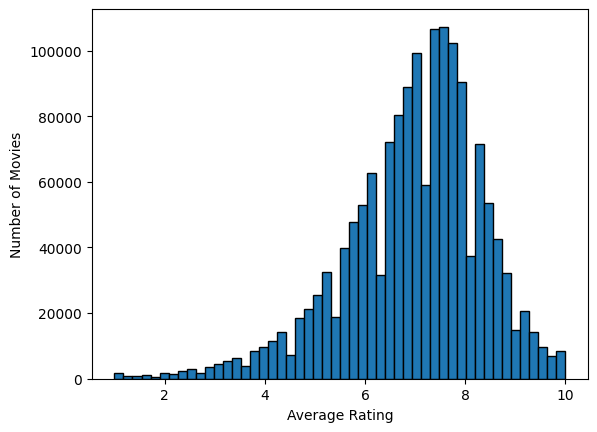

In [26]:
plt.hist(df_title_ratings['averageRating'], bins=50, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')

Text(0, 0.5, 'Number of Movies in log scale')

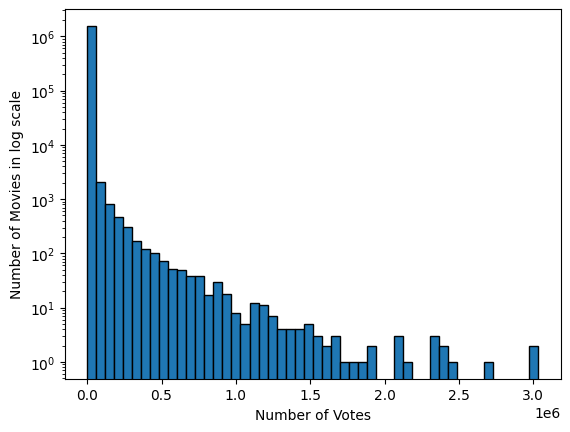

In [27]:
plt.hist(df_title_ratings['numVotes'], bins=50, edgecolor='black', log=True)
plt.xlabel('Number of Votes')
plt.ylabel('Number of Movies in log scale')

In [28]:
df_title_basics_ratings = df_title_basics.merge(df_title_ratings, on='tconst', how='left')
df_title_basics_ratings

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.4,223.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,983.0
2,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama,5.7,32.0
3,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,79.0
4,tt0000941,Locura de amor,Locura de amor,1909,45,Drama,4.8,32.0
...,...,...,...,...,...,...,...,...
306017,tt9916190,Safeguard,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,263.0
306018,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506.0
306019,tt9916362,Coven,Akelarre,2020,92,"Drama,History",6.4,6033.0
306020,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9.0


Filmes sem avaliação

In [29]:
df_title_basics_ratings[df_title_basics_ratings['numVotes'].isna()]

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
47,tt0002978,Hoodman Blind,Hoodman Blind,1913,50,Drama,NaN,NaN
54,tt0003048,A Lady of Quality,A Lady of Quality,1913,50,Drama,NaN,NaN
55,tt0003076,Livets konflikter,Livets konflikter,1913,64,Drama,NaN,NaN
66,tt0003306,På livets ödesvägar,På livets ödesvägar,1913,57,Drama,NaN,NaN
70,tt0003335,The Robbers,The Robbers,1913,56,Drama,NaN,NaN
...,...,...,...,...,...,...,...,...
305993,tt9909418,White Dresses,White Dresses,1996,50,Drama,NaN,NaN
305994,tt9909650,Hellbiro,Hellbiro,2018,95,Comedy,NaN,NaN
306004,tt9911750,Chambu Gabale,Chambu Gabale,1989,131,Comedy,NaN,NaN
306006,tt9913594,Bacchanalia,Bacchanalia,2017,72,"Drama,Mystery,Thriller",NaN,NaN


Removendo filmes sem avaliação

In [30]:
df_title_basics_ratings = df_title_basics_ratings.dropna()
df_title_basics_ratings

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.4,223.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,983.0
2,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama,5.7,32.0
3,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,79.0
4,tt0000941,Locura de amor,Locura de amor,1909,45,Drama,4.8,32.0
...,...,...,...,...,...,...,...,...
306017,tt9916190,Safeguard,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,263.0
306018,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506.0
306019,tt9916362,Coven,Akelarre,2020,92,"Drama,History",6.4,6033.0
306020,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9.0


In [31]:
# df_title_basics_ratings.to_csv('data/processed/title_basics_with_ratings.tsv.gz', sep='\t', compression='gzip', index=False)

## 3. title crew

In [35]:
df_title_crew = pd.read_csv('data/raw/title.crew.tsv.gz', sep='\t', compression='gzip')
df_title_crew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,nm0721526
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
11599793,tt9916848,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
11599794,tt9916850,nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284"
11599795,tt9916852,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
11599796,tt9916856,nm10538645,nm6951431


In [36]:
df_title_basics_ratings_crew = df_title_basics_ratings.merge(df_title_crew, on='tconst', how='left')
df_title_basics_ratings_crew

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.4,223.0,nm0085156,nm0085156
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,983.0,nm0846879,nm0846879
2,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama,5.7,32.0,nm0141150,nm0141150
3,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,79.0,"nm0091767,nm0877783","nm0000875,nm0877783"
4,tt0000941,Locura de amor,Locura de amor,1909,45,Drama,4.8,32.0,"nm0063413,nm0550220","nm0063413,nm0550220,nm0848502"
...,...,...,...,...,...,...,...,...,...,...
236977,tt9916190,Safeguard,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,263.0,nm7308376,nm7308376
236978,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506.0,nm1480867,"nm1480867,nm10538402,nm5584269"
236979,tt9916362,Coven,Akelarre,2020,92,"Drama,History",6.4,6033.0,nm1893148,"nm1893148,nm3471432"
236980,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9.0,nm4457074,"nm4843252,nm4900525,nm2679404"


In [37]:
df_title_basics_ratings_crew.to_csv('data/processed/title_basics_ratings_crew.tsv.gz', sep='\t', compression='gzip', index=False)

## 4.

In [40]:
df_title_basics_ratings_crew = pd.read_csv('data/processed/title_basics_ratings_crew.tsv.gz', sep='\t', compression='gzip')
df_title_basics_ratings_crew

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.4,223.0,nm0085156,nm0085156
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,983.0,nm0846879,nm0846879
2,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama,5.7,32.0,nm0141150,nm0141150
3,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,79.0,"nm0091767,nm0877783","nm0000875,nm0877783"
4,tt0000941,Locura de amor,Locura de amor,1909,45,Drama,4.8,32.0,"nm0063413,nm0550220","nm0063413,nm0550220,nm0848502"
...,...,...,...,...,...,...,...,...,...,...
236977,tt9916190,Safeguard,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,263.0,nm7308376,nm7308376
236978,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506.0,nm1480867,"nm1480867,nm10538402,nm5584269"
236979,tt9916362,Coven,Akelarre,2020,92,"Drama,History",6.4,6033.0,nm1893148,"nm1893148,nm3471432"
236980,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9.0,nm4457074,"nm4843252,nm4900525,nm2679404"


In [38]:
titlesid = df_title_basics_ratings_crew['tconst']

In [39]:
df_principals = pd.read_csv('data/raw/title.principals.tsv.gz', sep='\t', compression='gzip')
df_principals

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N
...,...,...,...,...,...,...
92101005,tt9916880,17,nm0996406,director,principal director,\N
92101006,tt9916880,18,nm1482639,writer,\N,\N
92101007,tt9916880,19,nm2586970,writer,books,\N
92101008,tt9916880,20,nm1594058,producer,producer,\N


In [41]:
df_principals = df_principals[df_principals['tconst'].isin(titlesid)]
df_principals

,tconst,ordering,nconst,category,job,characters
28,tt0000009,1,nm0063086,actress,\N,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
29,tt0000009,2,nm0183823,actor,\N,"[""Mr. Hamilton""]"
30,tt0000009,3,nm1309758,actor,\N,"[""Chauncey Depew - the Director of the New Yor..."
31,tt0000009,4,nm0085156,director,\N,\N
32,tt0000009,5,nm0085156,writer,\N,\N
...,...,...,...,...,...,...
92100056,tt9916730,10,nm10538612,writer,\N,\N
92100057,tt9916730,11,nm10538614,producer,producer,\N
92100058,tt9916730,12,nm10538613,producer,associate producer,\N
92100059,tt9916730,13,nm1957275,cinematographer,\N,\N


In [43]:
df_principals = df_principals[df_principals['category'].isin(['actor', 'actress'])]
df_principals

,tconst,ordering,nconst,category,job,characters
28,tt0000009,1,nm0063086,actress,\N,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
29,tt0000009,2,nm0183823,actor,\N,"[""Mr. Hamilton""]"
30,tt0000009,3,nm1309758,actor,\N,"[""Chauncey Depew - the Director of the New Yor..."
1339,tt0000574,1,nm0846887,actress,\N,"[""Kate Kelly""]"
1340,tt0000574,2,nm0846894,actor,\N,"[""School Master""]"
...,...,...,...,...,...,...
92100050,tt9916730,4,nm4852679,actor,\N,\N
92100051,tt9916730,5,nm9050497,actor,\N,\N
92100052,tt9916730,6,nm7365126,actress,\N,\N
92100053,tt9916730,7,nm1576284,actress,\N,\N


In [44]:
df_principals = df_principals.drop(columns=['job'])

In [45]:
df_principals

,tconst,ordering,nconst,category,characters
28,tt0000009,1,nm0063086,actress,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
29,tt0000009,2,nm0183823,actor,"[""Mr. Hamilton""]"
30,tt0000009,3,nm1309758,actor,"[""Chauncey Depew - the Director of the New Yor..."
1339,tt0000574,1,nm0846887,actress,"[""Kate Kelly""]"
1340,tt0000574,2,nm0846894,actor,"[""School Master""]"
...,...,...,...,...,...
92100050,tt9916730,4,nm4852679,actor,\N
92100051,tt9916730,5,nm9050497,actor,\N
92100052,tt9916730,6,nm7365126,actress,\N
92100053,tt9916730,7,nm1576284,actress,\N


In [49]:
df_principals['person'] = '('+df_principals['nconst']+','+df_principals['category']+','+df_principals['characters']+')'

In [51]:
df_principals = df_principals.drop(columns=['ordering', 'nconst', 'category', 'characters'])
df_principals

,tconst,ordering,person
28,tt0000009,1,"(nm0063086,actress,[""Miss Geraldine Holbrook (..."
29,tt0000009,2,"(nm0183823,actor,[""Mr. Hamilton""])"
30,tt0000009,3,"(nm1309758,actor,[""Chauncey Depew - the Direct..."
1339,tt0000574,1,"(nm0846887,actress,[""Kate Kelly""])"
1340,tt0000574,2,"(nm0846894,actor,[""School Master""])"
...,...,...,...
92100050,tt9916730,4,"(nm4852679,actor,\N)"
92100051,tt9916730,5,"(nm9050497,actor,\N)"
92100052,tt9916730,6,"(nm7365126,actress,\N)"
92100053,tt9916730,7,"(nm1576284,actress,\N)"


In [55]:
df_principals = df_principals[['tconst', 'person']].groupby('tconst').agg('sum').reset_index()
df_principals

,tconst,person
0,tt0000009,"(nm0063086,actress,[""Miss Geraldine Holbrook (..."
1,tt0000574,"(nm0846887,actress,[""Kate Kelly""])(nm0846894,a..."
2,tt0000591,"(nm0906197,actor,\N)(nm0332182,actor,\N)(nm132..."
3,tt0000679,"(nm0000875,actor,[""The Wizard of Oz Man""])(nm0..."
4,tt0000941,"(nm0034453,actor,\N)(nm0140054,actor,\N)(nm024..."
...,...,...
234635,tt9916190,"(nm0302466,actor,[""Frank""])(nm2009056,actor,[""..."
234636,tt9916270,"(nm0144812,actor,[""Ascoltatore""])(nm3080119,ac..."
234637,tt9916362,"(nm3766704,actress,[""Ana""])(nm0107165,actor,[""..."
234638,tt9916538,"(nm8678236,actress,[""Sinta""])(nm1417182,actres..."


In [57]:
df_principals['person'] = df_principals['person'].str.replace(')(', '),(')
df_principals

,tconst,person
0,tt0000009,"(nm0063086,actress,[""Miss Geraldine Holbrook (..."
1,tt0000574,"(nm0846887,actress,[""Kate Kelly""]),(nm0846894,..."
2,tt0000591,"(nm0906197,actor,\N),(nm0332182,actor,\N),(nm1..."
3,tt0000679,"(nm0000875,actor,[""The Wizard of Oz Man""]),(nm..."
4,tt0000941,"(nm0034453,actor,\N),(nm0140054,actor,\N),(nm0..."
...,...,...
234635,tt9916190,"(nm0302466,actor,[""Frank""]),(nm2009056,actor,[..."
234636,tt9916270,"(nm0144812,actor,[""Ascoltatore""]),(nm3080119,a..."
234637,tt9916362,"(nm3766704,actress,[""Ana""]),(nm0107165,actor,[..."
234638,tt9916538,"(nm8678236,actress,[""Sinta""]),(nm1417182,actre..."


In [58]:
df_title_basics_ratings_crew

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.4,223.0,nm0085156,nm0085156
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,983.0,nm0846879,nm0846879
2,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama,5.7,32.0,nm0141150,nm0141150
3,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,79.0,"nm0091767,nm0877783","nm0000875,nm0877783"
4,tt0000941,Locura de amor,Locura de amor,1909,45,Drama,4.8,32.0,"nm0063413,nm0550220","nm0063413,nm0550220,nm0848502"
...,...,...,...,...,...,...,...,...,...,...
236977,tt9916190,Safeguard,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,263.0,nm7308376,nm7308376
236978,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506.0,nm1480867,"nm1480867,nm10538402,nm5584269"
236979,tt9916362,Coven,Akelarre,2020,92,"Drama,History",6.4,6033.0,nm1893148,"nm1893148,nm3471432"
236980,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9.0,nm4457074,"nm4843252,nm4900525,nm2679404"


In [59]:
df_title_basics_ratings_crew = df_title_basics_ratings_crew.merge(df_principals, on='tconst', how='left')
df_title_basics_ratings_crew

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,person
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.4,223.0,nm0085156,nm0085156,"(nm0063086,actress,[""Miss Geraldine Holbrook (..."
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,983.0,nm0846879,nm0846879,"(nm0846887,actress,[""Kate Kelly""]),(nm0846894,..."
2,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama,5.7,32.0,nm0141150,nm0141150,"(nm0906197,actor,\N),(nm0332182,actor,\N),(nm1..."
3,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,79.0,"nm0091767,nm0877783","nm0000875,nm0877783","(nm0000875,actor,[""The Wizard of Oz Man""]),(nm..."
4,tt0000941,Locura de amor,Locura de amor,1909,45,Drama,4.8,32.0,"nm0063413,nm0550220","nm0063413,nm0550220,nm0848502","(nm0034453,actor,\N),(nm0140054,actor,\N),(nm0..."
...,...,...,...,...,...,...,...,...,...,...,...
236977,tt9916190,Safeguard,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,263.0,nm7308376,nm7308376,"(nm0302466,actor,[""Frank""]),(nm2009056,actor,[..."
236978,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506.0,nm1480867,"nm1480867,nm10538402,nm5584269","(nm0144812,actor,[""Ascoltatore""]),(nm3080119,a..."
236979,tt9916362,Coven,Akelarre,2020,92,"Drama,History",6.4,6033.0,nm1893148,"nm1893148,nm3471432","(nm3766704,actress,[""Ana""]),(nm0107165,actor,[..."
236980,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9.0,nm4457074,"nm4843252,nm4900525,nm2679404","(nm8678236,actress,[""Sinta""]),(nm1417182,actre..."


In [63]:
df_title_basics_ratings_crew['numVotes'] = df_title_basics_ratings_crew['numVotes'].astype(int)
df_title_basics_ratings_crew

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,person
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.4,223,nm0085156,nm0085156,"(nm0063086,actress,[""Miss Geraldine Holbrook (..."
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,983,nm0846879,nm0846879,"(nm0846887,actress,[""Kate Kelly""]),(nm0846894,..."
2,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama,5.7,32,nm0141150,nm0141150,"(nm0906197,actor,\N),(nm0332182,actor,\N),(nm1..."
3,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,79,"nm0091767,nm0877783","nm0000875,nm0877783","(nm0000875,actor,[""The Wizard of Oz Man""]),(nm..."
4,tt0000941,Locura de amor,Locura de amor,1909,45,Drama,4.8,32,"nm0063413,nm0550220","nm0063413,nm0550220,nm0848502","(nm0034453,actor,\N),(nm0140054,actor,\N),(nm0..."
...,...,...,...,...,...,...,...,...,...,...,...
236977,tt9916190,Safeguard,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,263,nm7308376,nm7308376,"(nm0302466,actor,[""Frank""]),(nm2009056,actor,[..."
236978,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506,nm1480867,"nm1480867,nm10538402,nm5584269","(nm0144812,actor,[""Ascoltatore""]),(nm3080119,a..."
236979,tt9916362,Coven,Akelarre,2020,92,"Drama,History",6.4,6033,nm1893148,"nm1893148,nm3471432","(nm3766704,actress,[""Ana""]),(nm0107165,actor,[..."
236980,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9,nm4457074,"nm4843252,nm4900525,nm2679404","(nm8678236,actress,[""Sinta""]),(nm1417182,actre..."


In [64]:
df_title_basics_ratings_crew.to_csv('data/processed/title_final.tsv.gz', sep='\t', compression='gzip', index=False)

In [67]:
df_final_animation = df_title_basics_ratings_crew[df_title_basics_ratings_crew['genres'].str.contains('Animation', na=False)]
df_final_animation

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,person
2887,tt0015532,The Adventures of Prince Achmed,Die Abenteuer des Prinzen Achmed,1926,80,"Adventure,Animation,Drama",7.8,7273,"nm0718201,nm0002569",nm0718201,NaN
5216,tt0021309,The Story of the Fox,Le roman de Renard,1937,63,"Adventure,Animation,Comedy",7.6,1651,"nm0823089,nm0823088","nm0634113,nm0635163,nm0724858,nm0823089,nm0823...","(nm0202405,actor,[""Monkey""]),(nm0099679,actor,..."
8323,tt0026793,The New Gulliver,Novyy Gulliver,1935,75,"Adventure,Animation,Comedy",6.4,407,nm0699693,"nm8521133,nm6901796,nm0699693,nm0742914,nm0842605","(nm1238092,actor,[""Gulliver""]),(nm1238092,acto..."
10121,tt0029583,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,1937,83,"Adventure,Animation,Family",7.6,229619,"nm0183183,nm0359457,nm0414144,nm0604392,nm0668...","nm0342278,nm0342303,nm0780799,nm0187232,nm0257...","(nm0143314,actress,[""Snow White""]),(nm0143314,..."
11292,tt0031397,Gulliver's Travels,Gulliver's Travels,1939,76,"Adventure,Animation,Comedy",6.6,5089,"nm0281487,nm0101466,nm0130725,nm0186276,nm0377...","nm0842605,nm0786545,nm0330106,nm0397175,nm0682...","(nm0236756,actress,[""Princess Glory""]),(nm0743..."
...,...,...,...,...,...,...,...,...,...,...,...
236903,tt9894394,Upin & Ipin: Keris Siamang Tunggal,Upin & Ipin: Keris siamang tunggal,2019,100,"Adventure,Animation,Comedy",7.2,897,"nm10529303,nm10529305,nm10529304","nm5489577,nm10529311,nm10529312","(nm10529306,actress,[""Upin & Ipin""]),(nm105293..."
236913,tt9896916,Pilgrim's Progress,The Pilgrim's Progress,2019,108,"Adventure,Animation,Family",6.4,971,nm4775123,"nm0963344,nm4775123","(nm0861657,actor,[""Christian Pilgrim""]),(nm072..."
236921,tt9899716,Star Trek Enterprise II: Der Anfang vom Ende,Star Trek Enterprise II: Der Anfang vom Ende,2016,58,"Animation,Sci-Fi",7.3,33,nm4965130,"nm10531236,nm4965130,nm10524783,nm0734472","(nm10531235,actor,[""Captain Jonathan Archer""])..."
236928,tt9900060,Lupin the Third: Fujiko Mine's Lie,Lupin the IIIrd: Mine Fujiko no Uso,2019,58,"Adventure,Animation,Crime",6.9,557,nm1238086,"nm0700578,nm3338130,nm5248079","(nm0475737,actor,[""Arsene Lupin III""]),(nm0462..."


In [68]:
df_final_animation.to_csv('data/processed/title_final_animation.tsv.gz', sep='\t', compression='gzip', index=False)